# Chapter 4. MatPlotLib Tutorial

https://matplotlib.org/users/pyplot_tutorial.html

- MatPlotLib은 공학에서 가장 많이 사용되는 수치해석 소프트웨어 중 하나인 매트랩의 그래프 기능 혹은 시각화 기능을 파이썬에 구현한 라이브러리이다.<br>
- MatPlotLib의 하부 라이브러리인 Pyplot은 매트랩에서 사용하는 커맨드 방식의 라이브러리로 보다 쉽게 다양한 시각화를 구현할 수 있다는 장점이 있다. 
- 이 외에 객체지향 API를 제공하는데, 객체지향 API를 사용하면 보다 체계적이고 세밀한 시각화가 가능하다. 이 Tutorial에서는 Pyplot 위주로 설명한다.<br>
<br>
아래 내용은 주피터에서 그래프를 화면에 표시하거나, 한글을 사용하여 그래프를 그리거나, 그래프에 음수를 쓰는 경우를 대비해 항상 실행시키는 것이 좋다.

In [1]:
#필요한 패키지를 import
import matplotlib.pyplot as plt

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()   #윈도우
#font_name = 'AppleGothic'  #맥 OS 
rc('font', family=font_name) 			

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

#### PyPlot
- MatPlotLib을 사용할 때 가장 기본이 되는 객체
- 그래프를 작성할 수 있는 도구 집합
- 여기에 그림(figure), 축(axes) 등을 올릴 수 있음

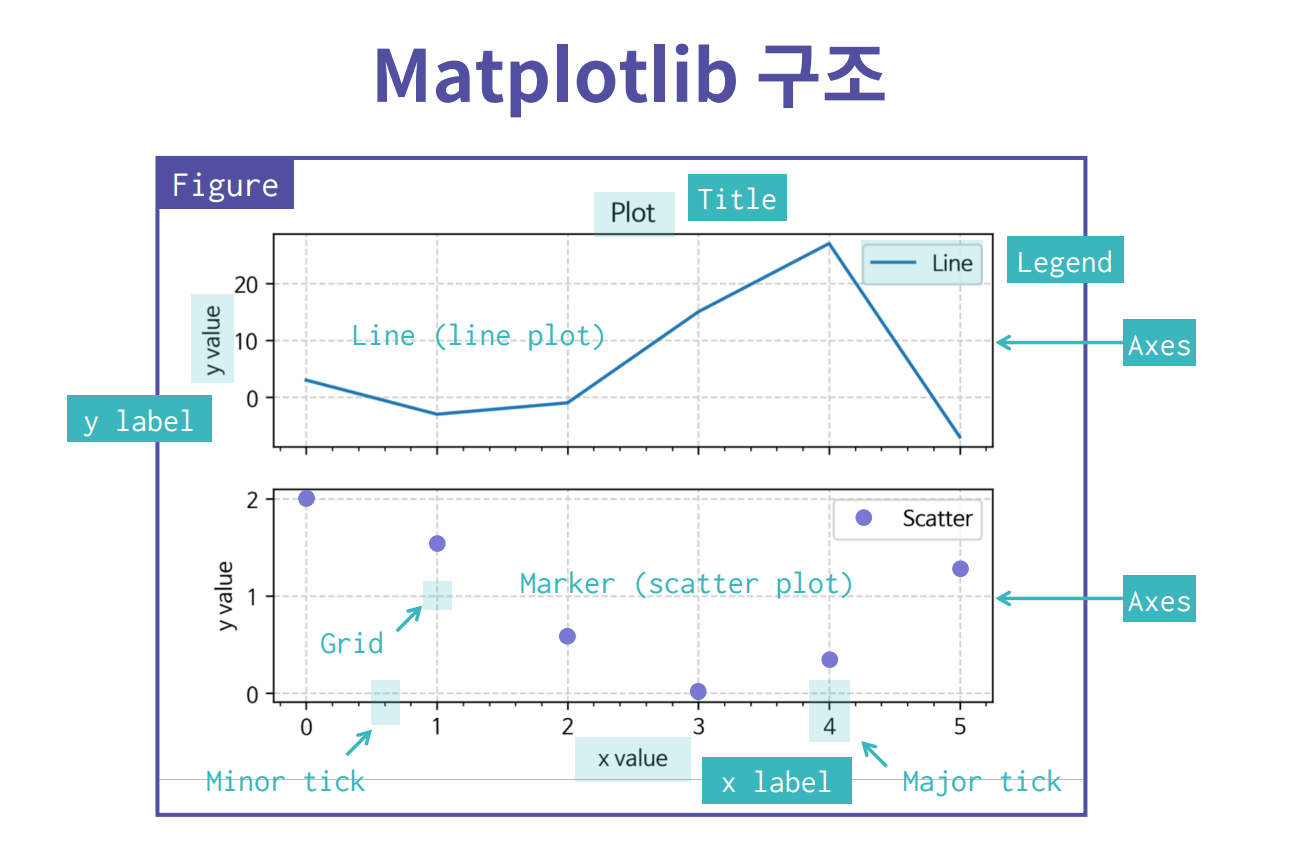
이미지 출처: https://velog.velcdn.com/images%2Fdlqhdus628%2Fpost%2F7ea8a19d-fc1a-46ee-8b62-8357da1335ab%2Fimage.png




### 1. plot()으로 그래프 그리기
- 1차원 리스트로 이루어진 변수의 값들을 연결해서 그래프를 그린다.
- x축은 리스트의 인덱스가 자동으로 할당된다.
- ylabel 혹은 xlabel로 y축이나 x축의 라벨을 지정할 수 있다.

- plot(): 그래프를 그리는 함수
- title(): 그래프 제목 지정
- xlabel(): x축의 라벨을 지정
- ylabel(): y축의 라벨을 지정
- show(): 만들어진 그래프를 출력

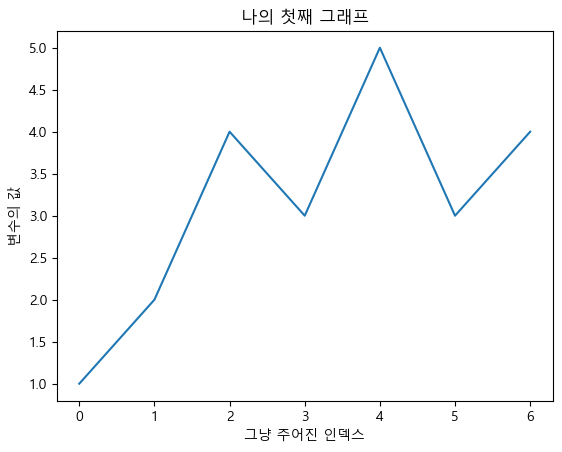

In [2]:
plt.plot([1, 2, 4, 3, 5, 3, 4])
plt.title('나의 첫째 그래프') # 그래프 제목
plt.xlabel('그냥 주어진 인덱스')  #x축의 label을 지정
plt.ylabel('변수의 값') #y축의 label을 지정
plt.show()

#### 두개의 변수를 좌표로 사용하는 2차원 그래프
plt.plot의 매개변수로 길이가 같은 두 개의 리스트를 준다.
<br> 좌표값 외에 'ro', 'b-' 등을 사용하여 점의 모양을 지정할 수 있다.
<br> plt.axis로 축의 범위를 지정할 수 있다.

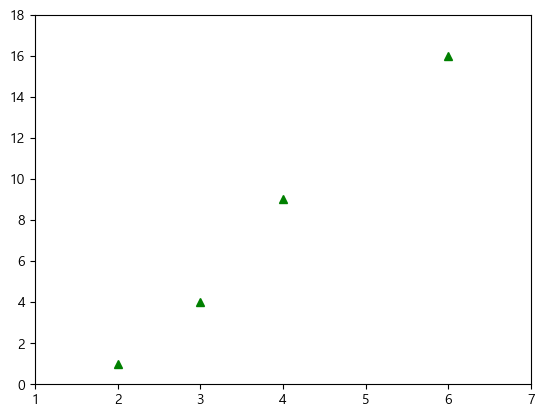

In [3]:
plt.plot([2,3,4,6], [1,4,9,16], 'g^') #'ro'는 붉은(r:red) 원(o:circle)으로 주어진 위치를 표시
# 'ro'를 사용하면 점은 연결되지 않는다
#'b-'는 blue, solid line을 의미한다.

plt.axis([1, 7, 0, 18]) #축의 범위를 지정 [xmin, xmax, ymin, ymax]

# 혹은 아래와 같이 x축과 y축의 범위를 별도로 지정할 수 있다.
#plt.xlim(1, 9)
#plt.ylim(0, 20)

plt.show()

아래 예제에서는 y = f(x) 형태로 y값이 x의 함수로 정의된 것을 그래프로 시각화한 예제이다. <br>
여러 그래프를 하나의 그림판에 겹쳐서 그리는 것도 보여주고 있다.

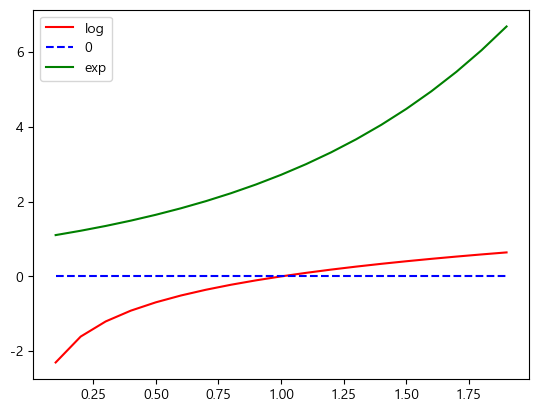

In [4]:
import numpy as np
from math import log

x = np.arange(0.1, 2., 0.1) # range()와는 달리 실제로 값이 생성되어 ndarray로 저장
plt.plot(x, np.log(x), 'r')
plt.plot(x, x*0, 'b--')
plt.plot(x, np.exp(x), 'g')
plt.legend(['log', '0', 'exp']) # 그래프를 그린 순서에 따라 범례를 표시
plt.show()

### 2. 산점도 (Scatter plot) 그리기

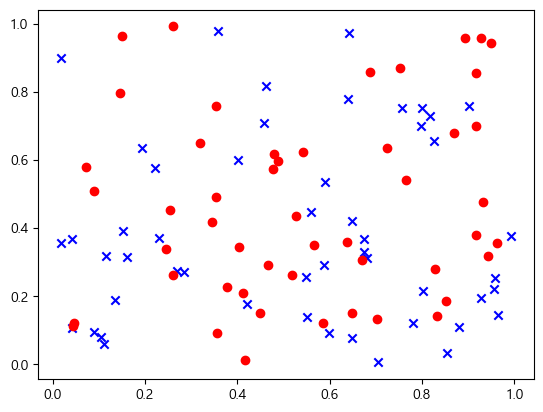

In [5]:
a = np.random.rand(50, 2)
b = np.random.rand(50, 2)

plt.scatter(a[:, 0], a[:, 1], c='b', marker='x')
plt.scatter(b[:, 0], b[:, 1], c='r', marker='o')
plt.show()

- 면적을 이용한 산점도 표현

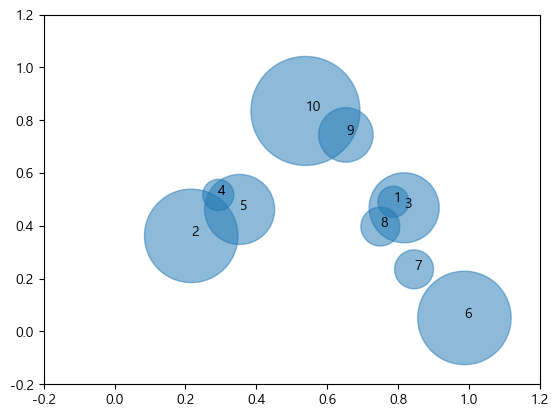

In [6]:
x = np.random.rand(10)
y = np.random.rand(10)
areas  = np.pi * np.random.randint(3, 15, 10) ** 2 * 10
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.scatter(x, y, s=areas, alpha=0.5)
texts = list(range(1, 11))
for i in range(10):
    plt.text(x[i], y[i], s=(i+1))
plt.show()

In [7]:
texts

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### 3. 막대그래프 (bar chart) 그리기
- bar(): 막대그래프 함수. width, color 지정 가능

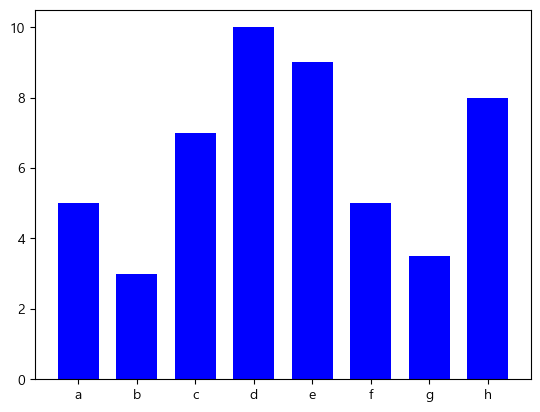

In [8]:
y = [5, 3, 7, 10, 9, 5, 3.5, 8]
#x = range(len(y))
x = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
plt.bar(x, y, width=0.7, color="blue")
plt.show()

#### 여러 항목을 비교하는 막대그래프

In [9]:
# 3가지 종류 별로 4개의 값을 비교
# 예를 들어 금 은 동메달 수를 4개 국가에 대해 비교
data = np.random.randint(1, 50, (3, 4))
print(data)

[[40 46 43  5]
 [ 5 48 33 41]
 [42  9 11 29]]


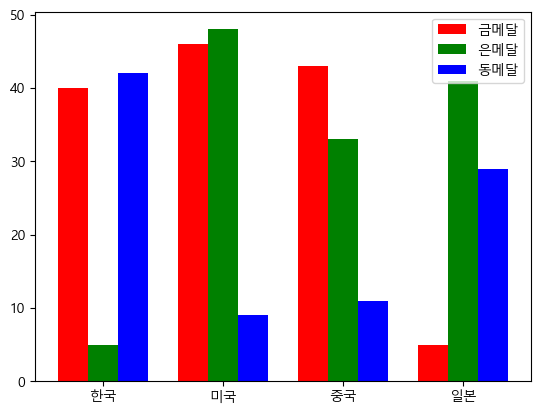

In [10]:
X = np.arange(0, 8, 2) #각 나라의 시작점

plt.bar(X, data[0], color='r', width=0.5)
plt.bar(X + 0.5, data[1], color='g', width=0.5)
plt.bar(X + 1, data[2], color='b', width=0.5)

plt.legend(["금메달", "은메달", "동메달"])
plt.xticks(X + 0.5, ("한국", "미국", "중국", "일본"))
plt.show()

#### 수평 막대 그래프

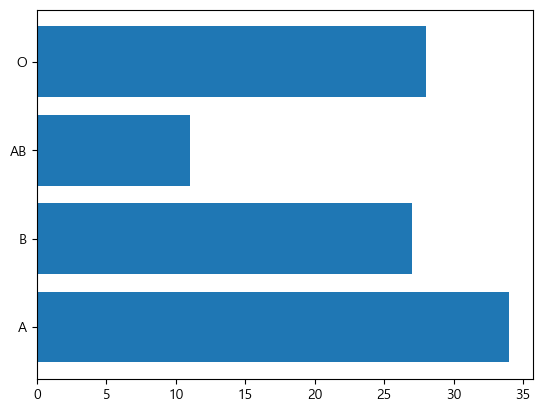

In [11]:
# 수평 막대 그래프도 많이 사용된다.
blood_type = ['A', 'B', 'AB', 'O']
counts = [34, 27, 11, 28]

plt.barh(blood_type, counts) 
plt.show()

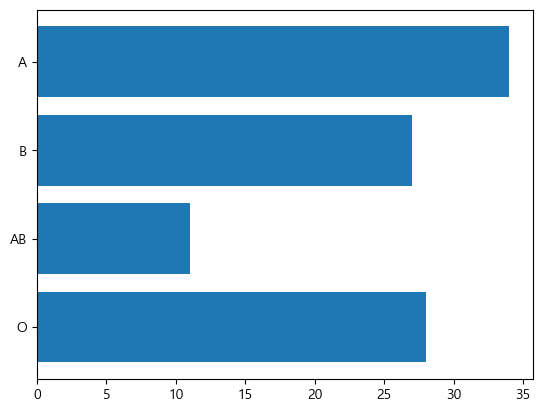

In [12]:
# 기본적으로 각 막대는 원점에서부터 순서대로 그려진다. 
# 따라서 현재 상태로 그리면 위에서부터 역순으로 그려진 것처럼 보인다.
#아래와 같이 names와 weights를 역순으로 바꿔서 그리면 위에서부터 순서대로 그릴 수 있다.
plt.barh(blood_type[::-1], counts[::-1])
plt.show()

막대바를 원하는 기준으로 정렬하여 그리고 싶으면 아래와 같이 sorted를 이용해서 정렬 후 그리는 것이 가능하다.<br>
실제로 아래와 같이 위에서부터 바의 크기가 큰 순으로 정렬하여 그리는 방식이 많이 사용된다.

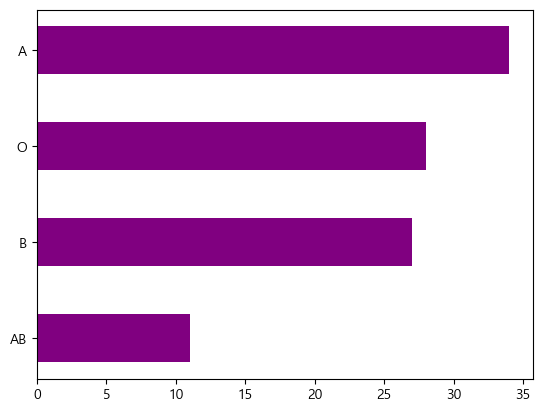

In [13]:
sorted_w = sorted(zip(blood_type, counts), key=lambda kv: kv[1])
n, w = zip(*sorted_w)

plt.barh(n, w, height=0.5, color='purple')
plt.show()

In [14]:
w #w가 정렬된 순서를 확인

(11, 27, 28, 34)

### 4. 파이 차트(Pie Chart) 그리기

https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html

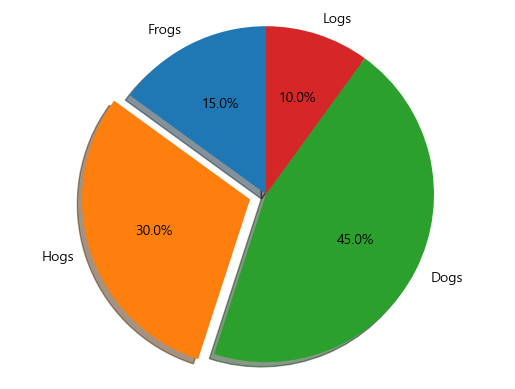

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs' #각 파이의 label
sizes = [15, 30, 45, 10] #각 파이의 크기
explode = (0, 0.1, 0, 0)  # 각 파이에 대해 중앙으로부터의 거리 지정, 여기서는 두번째 파이를 강조하기 위해 떼어냄

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#autopct: 파이의 값을 보여주기 위한 포맷팅, 소숫점이하 한 자리
#shadow: 그림자 여부
#startangle: 시작 위치를 지정, 90이면 y축 양의 방향에서 출발

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 5. 히스토그램 그리기

https://matplotlib.org/gallery/statistics/hist.html

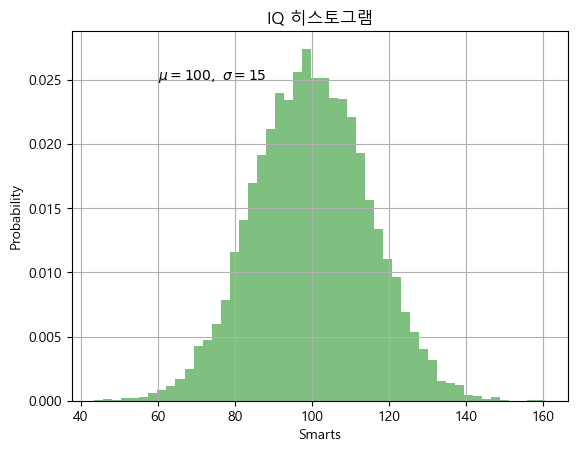

In [16]:
# random 함수를 사용할 때, reproducibility(재생산성)을 위해 seed를 지정
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) #정규분포에 가깝게 10000개의 값을 생성

# bins는 나누어서 보여 줄 칸의 수
# density가 True이면 y축을 확률로 변경, False이면 Count
plt.hist(x, bins=50, density=True, facecolor='g', alpha=0.5) # facecolor:내부색깔, alpha:투명도 조정
#plt.hist(x, bins=50)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('IQ 히스토그램')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # (60, 0.025) 좌표에 텍스트를 출력, $로 감싸서 TeX 수식 사용 가능
#plt.axis([40, 160, 0, 0.03]) #y축을 확률로 가정하고 적절한 범위를 지정, 만일 count로 하게 되면 조정이 필요
plt.grid(True)
plt.show()

In [17]:
len(x)

10000

### 6. 박스플롯(Boxplot)
- 데이터의 분포를 나타내면서 밀집 정도를 표현
- 사분위수 중에서 1사분위수(25%)부터 3사분위수(75%)까지를 박스 형태로 그림
- 박스 중간에 중앙값(2사분위수)를 표시
- IQR(InterQuartile Range): 3사분위수 - 1사분위수
- 최대허용값(upper fence): Q3 + 1.5 * IQR
- 최소허용값(lower fence): Q1 - 1.5 * IQR
- 이상치: 최대허용값과 최소허용값을 벗어난 값들

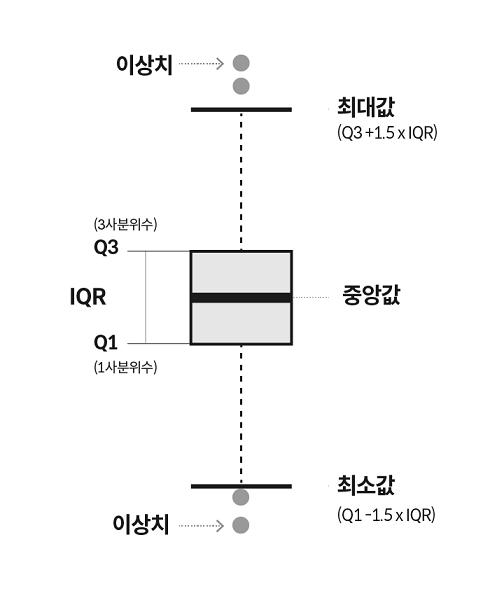

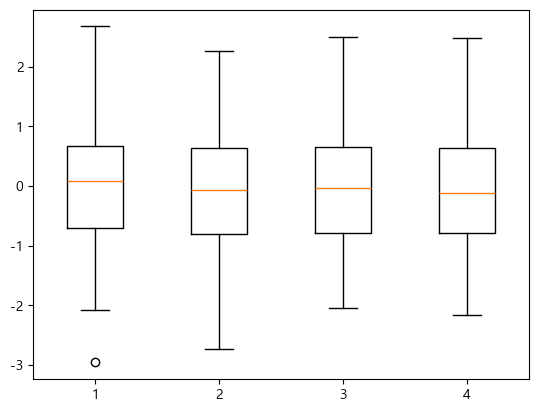

In [18]:
# 박스플롯의 예
data = np.random.randn(100, 4)
plt.boxplot(data)
plt.show()

### 7. 여러 그래프를 겹쳐서 그리기
- 매개변수로 x, y pair를 연속하여 할당하면 여러 그래프를 동시에 그릴 수 있다. <br>
- 너무나 당연하게도 리스트가 아닌 numpy array로 그래프를 그릴 수 있다. <br>
- 사실 리스트를 비롯한 모든 sequence는 내부에서 numpy array로 변환된다.

#### 선 스타일 지정
- 스타일을 문자열로 지정
- 첫 글자는 색깔을 지정. r(red), b(blue), g(green)
- 둘째 글자부터는 선 종류나 마커를 지정. --(대쉬 선), s(square, 네모), ^(세모)

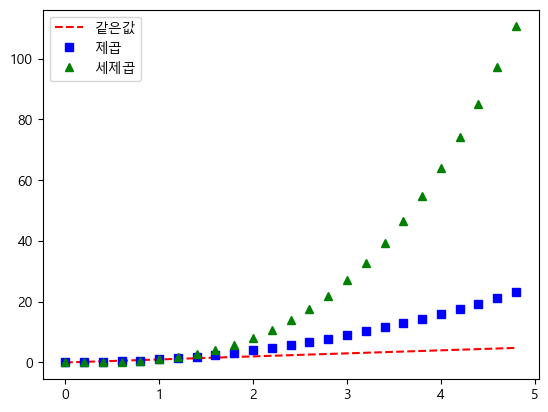

In [19]:
import numpy as np

# np.arange()를 이용해 x축 값을 생성
x = np.arange(0., 5., 0.2)

# 세가지 스타일로 그래프 겹쳐 그리기
plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')

# 아래와 같이 나눠서 하는 것도 가능
#plt.plot(t, t, 'r--')
#plt.plot(t, t**2, 'bs')
#plt.plot(t, t**3, 'g^')

plt.legend(['같은값', '제곱', '세제곱']) # 범례를 추가하고 싶을 때, 그린 plot의 수만큼 지정 가능

plt.show()

### 8. 선 속성 설정하기

https://matplotlib.org/stable/tutorials/pyplot.html

- setp() 함수를 이용하여 선 굵기, 모양 등 다양한 속성을 설정할 수 있다.<br>
- 중요 property
    - alpha: 투명도
    - color: 색상
    - linestyle: -, --, -., 등 사용가능
    - linewidth: 선 두께
    - marker: 점의 모양, o, s, ^ 등

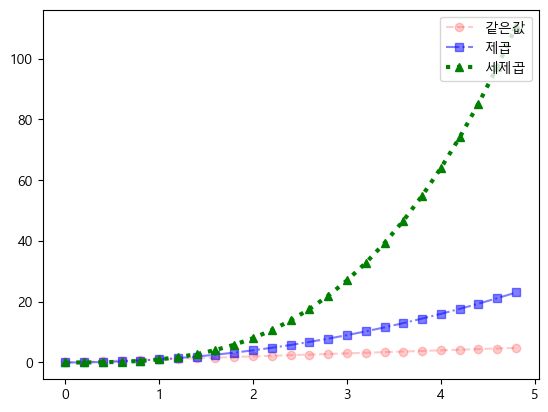

In [20]:
# np.arange()를 이용해 x축 값을 생성
x = np.arange(0., 5., 0.2)

line1 = plt.plot(x, x, label='같은값') #plot을 그릴 때, label을 지정할 수 있음
line2 = plt.plot(x, x**2, label='제곱') #지정한 label은 legend()에서 범례를 그릴 때 사용됨
line3 = plt.plot(x, x**3, label='세제곱')

plt.setp(line1, alpha=0.2, color='red', linestyle='--', marker='o')
plt.setp(line2, alpha=0.5, color='blue', linestyle='-.', marker='s')
plt.setp(line3, color='green', linestyle=':', linewidth=3, marker='^')

plt.legend(loc='upper right') #지정된 label을 이용해서 범례(legend)를 그림, loc은 legend의 위치를 지정

plt.show()

In [21]:
#line에 할당할 수 있는 property 값 확인
plt.setp(line1)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `~matplotlib.figure.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker st

#### figure와 axes에 대한 이해
- plt.plot()을 사용하면 figure와 axes를 자동으로 생성
- plt.subplots()를 이용하면 figure와 axes를 분리하여 생성할 수 있음

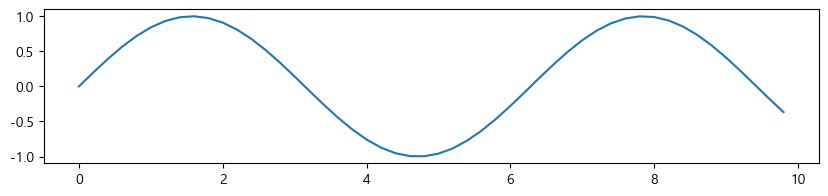

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 2) # figure size 설정
x = np.arange(0, 10, 0.2)
ax.plot(x, np.sin(x)) #ax에 그래프 그리기
plt.show()

### 9. 화면을 분할하여 여러 그래프를 그리기

https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

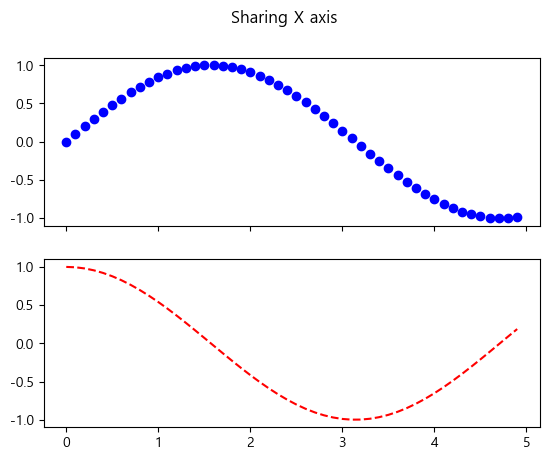

In [23]:
x = np.arange(0.0, 5.0, 0.1)
f, axarr = plt.subplots(2, sharex=True) # ncols는 생략, nrows는 2, 즉 두 개의 row로 된 subplot을 생성
# shareX, shareY는 각각 x축 혹은 y축을 공유할 지 여부

# f는 전체 그림판, axarr은 나누어진 두 개의 subplot을 array로 반환
f.suptitle('Sharing X axis')

axarr[0].plot(x, np.sin(x), 'bo') #첫째 subplot에 그림을 그림
axarr[1].plot(x, np.cos(x), 'r--') #둘째 subplot에 그림을 그림
plt.show()

2X2의 타일로 그래프 네 개를 그리고 싶다면?

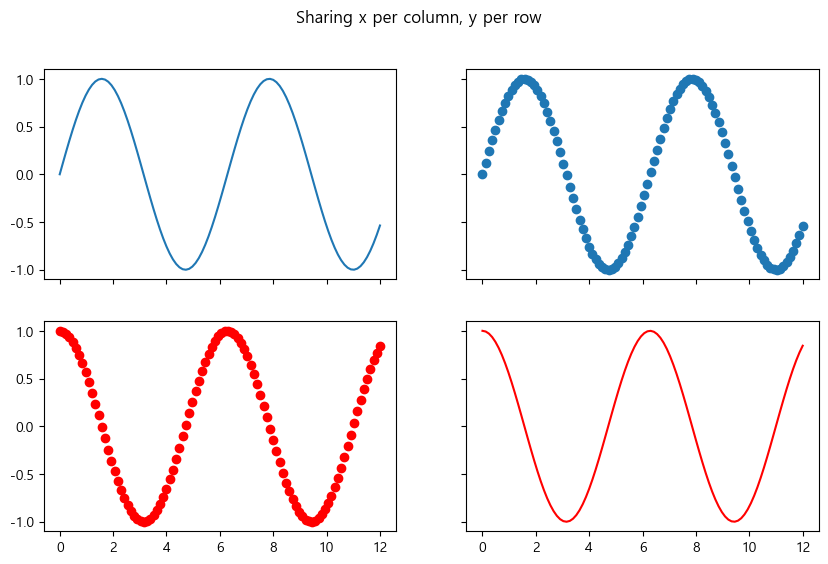

In [24]:
x = np.linspace(0, 12, 100) #주어진 범위(0~2*np.pi) 사이에 400개의 등간격 숫자를 생성
y = np.sin(x ** 2)

#2x2의 subplot 생성, figsize로 각 subplot의 크기를 지정
#axex는 행렬 형태로 반환, 그래프 좌표와 관계없이 행렬로 각 그림판(ax)이 배치됨
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 6)) 
f.suptitle('Sharing x per column, y per row')

axarr[0, 0].plot(x, np.sin(x))
axarr[0, 1].scatter(x, np.sin(x))
axarr[1, 0].scatter(x, np.cos(x), color='r')
axarr[1, 1].plot(x, np.cos(x), color='r')
plt.show()

subplot을 그리는 다른 방법

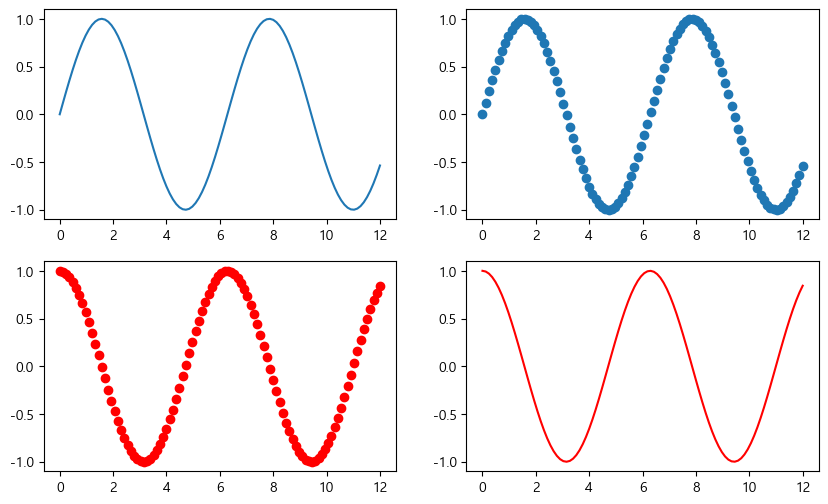

In [25]:
f = plt.figure(figsize=(10, 6)) #전체 그림판 설정 및 그래프 크기 설정

plt.subplot(2,2,1) #rows = 2, columns = 2로 나눈 것 중에서 첫째 subplot을 지정
plt.plot(x, np.sin(x))

plt.subplot(2,2,2)
plt.scatter(x, np.sin(x))

plt.subplot(2,2,3)
plt.scatter(x, np.cos(x), color='r')

plt.subplot(2,2,4)
plt.plot(x, np.cos(x), color='r')
plt.show()

그림을 pdf로 저장하기

In [26]:
f.savefig("foo.pdf", bbox_inches='tight')

#### 10. Kernel Density Estimation 

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable.<br>
주어진 연속확률변수에 대해 확률밀도함수를 추정하는 것을 의미한다.<br>
KDE의 이론적 설명은 다음 사이트를 참고.
https://darkpgmr.tistory.com/147

간단하게 설명하면 어떤 연속확률변수의 분포를 근사해내고자 하는 것인데, 쉽게 말해서 각 값에 대해 어느 정도의 확률이 있는지를 함수 혹은 그래프로 표현하고자 하는 것을 말한다.<br>
주어진 값들을 이용해 히스토그램을 그리면 유사한 분포를 얻을 수 있는데, 이 때 히스토그램은 우리에게 그 변수의 분포에 대한 대략적인 모양을 알려준다.<br>
그러나, 히스토그램은 불연속적(막대들이 결합된 모습)이고, bin-각 막대의 크기에 따라 모양이 달라지는 등의 문제가 있다.<br>
KDE는 이를 보완하기 위해 히스토그램을 부드럽게 smoothing한 형태라고 이해할 수 있다.<br>

여기서는 두 개의 연속확률분포에 대해 KDE를 하고 겹쳐서 비교하는 것을 실습하고자 한다.

In [27]:
# 필요한 데이터를 load, 여기서는 데이터의 내용은 중요하지 않음
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, Y = cancer.data[:, 0], cancer.target

In [28]:
X[:30] #대응하는 Y가 0인 그룹과 1인 그룹으로 나뉨

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 ])

In [29]:
Y[:30] #X에 대응하는 Y값 확인, 이 값에 따라 X를 두 그룹으로 나눌 수 있음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

먼저 scatter를 이용해 두 그룹의 모양을 살펴보고자 함

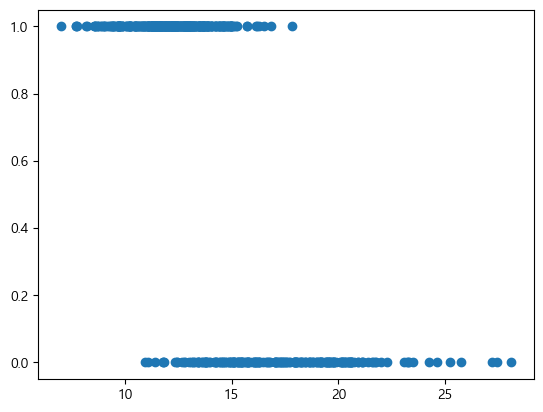

In [30]:
plt.scatter(X, Y)
plt.show()

위 그래프의 문제는 두 그룹의 값들이 대략 어떻게 나뉘는지는 알 수 있으나, 점들이 겹쳐서 그려져 있기 때문에 각 그룹의 분포를 정확히 알기 어렵다는 문제가 있다.<br>
즉 어떤 X 값 근처에 점들이 많이 겹쳐있는지 조금 겹쳐있는지를 알기 어려워서 X 값이 어디에 집중적으로 위치하는지를 판단하기 어렵다.<br>
이와 같은 문제는 히스토그램을 그려서 해결이 가능하다.<br>
히스토그램은 X값의 bin 별로 빈도를 보여주므로 어느 값 근처에 몰려 있는지를 파악하기가 쉽다.

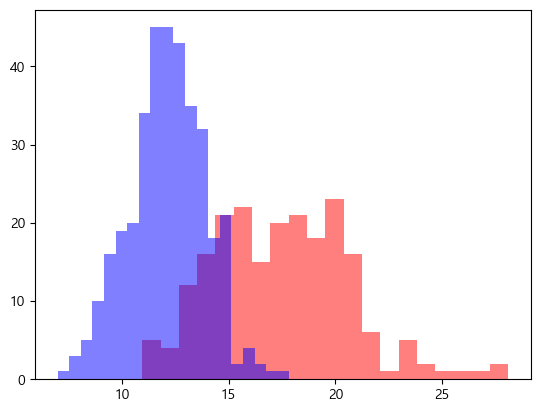

In [31]:
X0 = X[Y == 0] # Y가 0인 값을 분리
X1 = X[Y == 1] # Y가 1인 값을 분리

plt.hist(X0, bins=20, color='red', alpha=.5)
plt.hist(X1, bins=20, color='blue', alpha=.5)
plt.show()

히스토그램은 위에서 설명한 바와 같이 불연속적인 경계와 적절한 bin의 수를 잘 선택해야 한다는 등의 문제가 있으므로 KDE를 통해 연속적인 그래프를 그리면 더 보기가 편하다.
seaborn은 pyplot과 함께 현재 파이썬에서 가장 많이 사용되고 있는 그래프 패키지 중 하나이다.
더 복잡한 그래프들을 pyplot보다 쉽게 구현하는 것이 가능하다.

c:\Users\ParkSangun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ParkSangun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


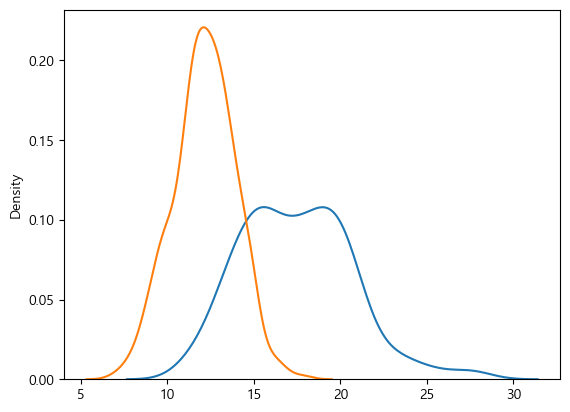

In [32]:
import seaborn as sns
#sns.set_style('whitegrid')
g = sns.kdeplot(X0)
g = sns.kdeplot(X1)